# Food Production Environmental Impact Analysis

In [113]:
# data source: https://www.kaggle.com/selfvivek/environment-impact-of-food-production

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import cluster

%matplotlib inline

In [115]:
#import dataset
df = pd.read_csv('./Food_Production.csv')

### Initial exploration

In [116]:
df.shape

(43, 23)

In [117]:
df.columns

Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per 100g protein 

In [118]:
df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


There are 43 rows containing types of food with 22 columns for the environmental impact features.

Looks like the first few columns have data relating to GHG emissions across different stages in the lifecycle of food production.

I will analyze the GHG emissions data further to find out what types of food contribute the most amount of GHG emissions.

### Analyzing GHG emissions by food type and production lifecyle stage

In [119]:
#create subset for emissions analysis
df_emissions= df.iloc[:,:9]

In [120]:
df_emissions.shape

(43, 9)

In [121]:
df_emissions.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0


In [122]:
#sort by total emissions
stage_1=df_emissions.sort_values(by='Total_emissions', ascending= True)
stage_1.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions
11,Nuts,-2.1,0.0,2.1,0.0,0.1,0.1,0.0,0.2
21,Onions & Leeks,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3
25,Citrus Fruit,-0.1,0.0,0.3,0.0,0.1,0.0,0.0,0.3
22,Root Vegetables,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3
5,Potatoes,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3


In [123]:
#remove total emissions from graph since it will be redundant
stage_2=stage_1.iloc[:,:8]

# list the top 10 foods with highest GHG emissions and reverse order to list highest contributor first
stage_2.tail(10).iloc[::-1]

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail
33,Beef (beef herd),16.3,1.9,39.4,1.3,0.3,0.2,0.2
35,Lamb & Mutton,0.5,2.4,19.5,1.1,0.5,0.3,0.2
39,Cheese,4.5,2.3,13.1,0.7,0.1,0.2,0.3
34,Beef (dairy herd),0.9,2.5,15.7,1.1,0.4,0.3,0.2
32,Dark Chocolate,14.3,0.0,3.7,0.2,0.1,0.4,0.0
31,Coffee,3.7,0.0,10.4,0.6,0.1,1.6,0.1
42,Shrimps (farmed),0.2,2.5,8.4,0.0,0.2,0.3,0.2
16,Palm Oil,3.1,0.0,2.1,1.3,0.2,0.9,0.0
36,Pig Meat,1.5,2.9,1.7,0.3,0.3,0.3,0.2
37,Poultry Meat,2.5,1.8,0.7,0.4,0.3,0.2,0.2


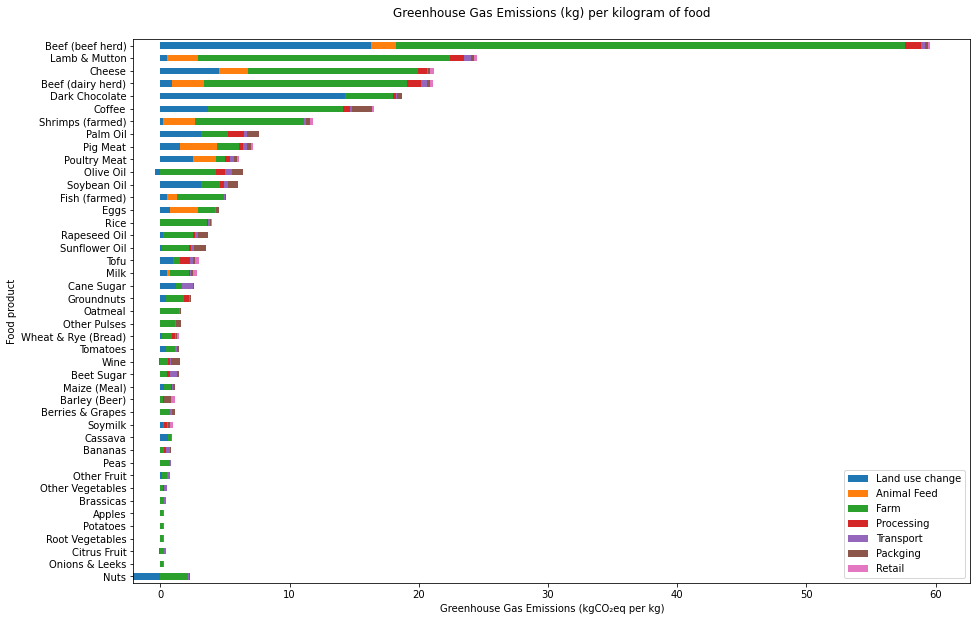

In [136]:
# create horizontal bar chart for emissions
fig, ax = plt.subplots(figsize=(15, 10))

stage_2.set_index('Food product').plot(kind = 'barh', stacked=True, ax=ax)
plt.xlabel('Greenhouse Gas Emissions (kgCO₂eq per kg)')
plt.title('Greenhouse Gas Emissions (kg) per kilogram of food', y=1.03)

plt.show()

It seems that the top GHG emissions producing foods are mainly animal-based. However, I am surprised to see coffee and dark chocolate near the top of the list.

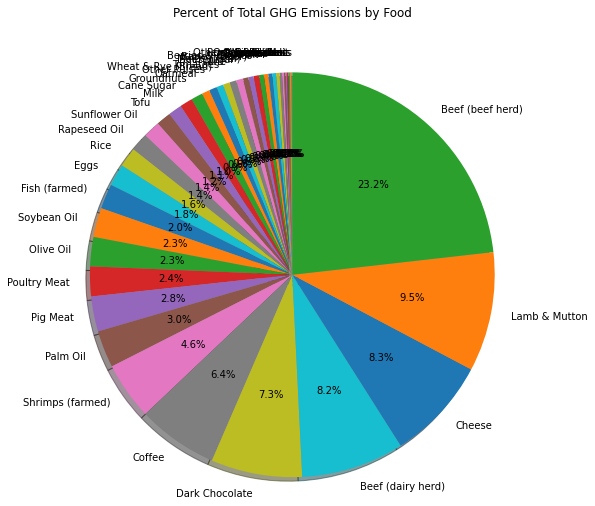

In [125]:
#create pie chart for Total emissions
labels = stage_1['Food product']
sizes = stage_1['Total_emissions']

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Percent of Total GHG Emissions by Food', y=1.08)

plt.show()

Again it is noticeable that roughly half of the total emissions come from animal-based food products.

Now let's see which food product contributes the highest GHG emission at each stage of the food production cycle.

In [126]:
# get the food type of each max value in every column
maxValueIndexObj = df_emissions.set_index('Food product').idxmax()

print("Food product with highest GHG emissions for each food production stage:")
print(maxValueIndexObj)

Food product with highest GHG emissions for each food production stage:
Land use change    Beef (beef herd)
Animal Feed                Pig Meat
Farm               Beef (beef herd)
Processing                 Palm Oil
Transport                Cane Sugar
Packging                     Coffee
Retail                Barley (Beer)
Total_emissions    Beef (beef herd)
dtype: object


### Analyzing Scarcity-weighted water use impact of different foods

In [127]:
#create dataframe for Scarcity-weighted water use
df_sw = df.sort_values(by='Scarcity-weighted water use per kilogram (liters per kilogram)', ascending=True)
df_sw = df_sw.dropna(subset=['Scarcity-weighted water use per kilogram (liters per kilogram)'])
df_sw.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
6,Cassava,0.6,0.0,0.2,0.0,0.1,0.0,0.0,0.9,0.708419,...,NaN,0.0,1.355236,14.666667,1.858316,1.81,20.111111,0.0,NaN,NaN
16,Palm Oil,3.1,0.0,2.1,1.3,0.2,0.9,0.0,7.6,1.207014,...,NaN,6.4,0.828054,NaN,0.273756,2.42,NaN,36.2,NaN,4.095023
31,Coffee,3.7,0.0,10.4,0.6,0.1,1.6,0.1,16.5,197.357143,...,32.375000,25.9,50.946429,35.662500,38.607143,21.62,27.025000,337.0,421.250000,601.785714
26,Bananas,0.0,0.0,0.3,0.1,0.3,0.1,0.0,0.8,5.483333,...,1272.222222,114.5,1.433333,9.555556,3.216667,1.93,21.444444,661.9,7354.444444,1103.166667
22,Root Vegetables,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,4.351351,...,284.000000,28.4,1.162162,4.300000,0.891892,0.33,3.300000,929.2,9292.000000,2511.351351


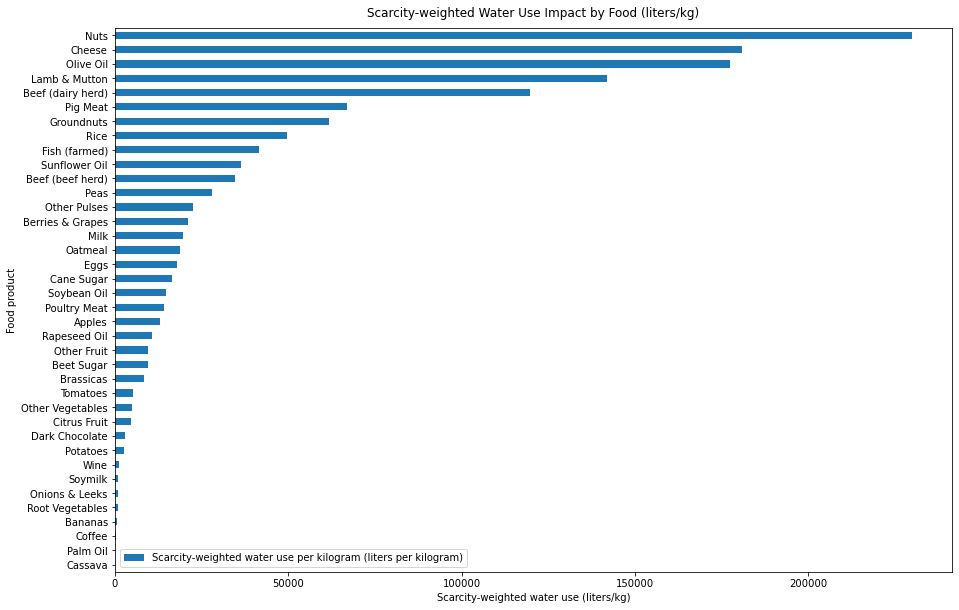

In [128]:
#create chart for scarcity-weighted water use analysis
fig, ax = plt.subplots(figsize=(15, 10))

df_sw.plot(x='Food product', y='Scarcity-weighted water use per kilogram (liters per kilogram)', kind = 'barh', ax=ax)
plt.xlabel('Scarcity-weighted water use (liters/kg)')
plt.title('Scarcity-weighted Water Use Impact by Food (liters/kg)', y=1.01)

plt.show()

Scarcity-weighted water use represents freshwater use weighted by local water scarcity. We can see that 3 of the top 5 foods are animal-based. It is interesting to see that nuts and olive oil require high amounts of scarcity-weighted water. This is likely due to many nuts and olives being grown primarily in California where there has been long stretches of drought.

### Analyze Land use impact of different foods

In [129]:
#create dataframe for land use
df_lu = df.sort_values(by='Land use per kilogram (m² per kilogram)', ascending=True)
df_lu = df_lu.dropna(subset=['Land use per kilogram (m² per kilogram)'])
df_lu.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
22,Root Vegetables,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,4.351351,...,284.000000,28.4,1.162162,4.300000,0.891892,0.33,3.3,929.2,9292.000000,2511.351351
24,Other Vegetables,0.0,0.0,0.2,0.1,0.2,0.0,0.0,0.5,NaN,...,NaN,102.5,NaN,NaN,NaN,0.38,NaN,4911.4,NaN,NaN
21,Onions & Leeks,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,8.756757,...,110.000000,14.3,1.351351,3.846154,1.054054,0.39,3.0,932.0,7169.230769,2518.918919
23,Brassicas,0.0,0.0,0.3,0.0,0.1,0.0,0.0,0.4,29.470588,...,1085.454545,119.4,3.000000,4.636364,3.235294,0.55,5.0,8455.1,76864.545450,49735.882350
27,Apples,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,3.020833,...,6003.333333,180.1,0.895833,14.333333,1.312500,0.63,21.0,12948.6,431620.000000,26976.250000


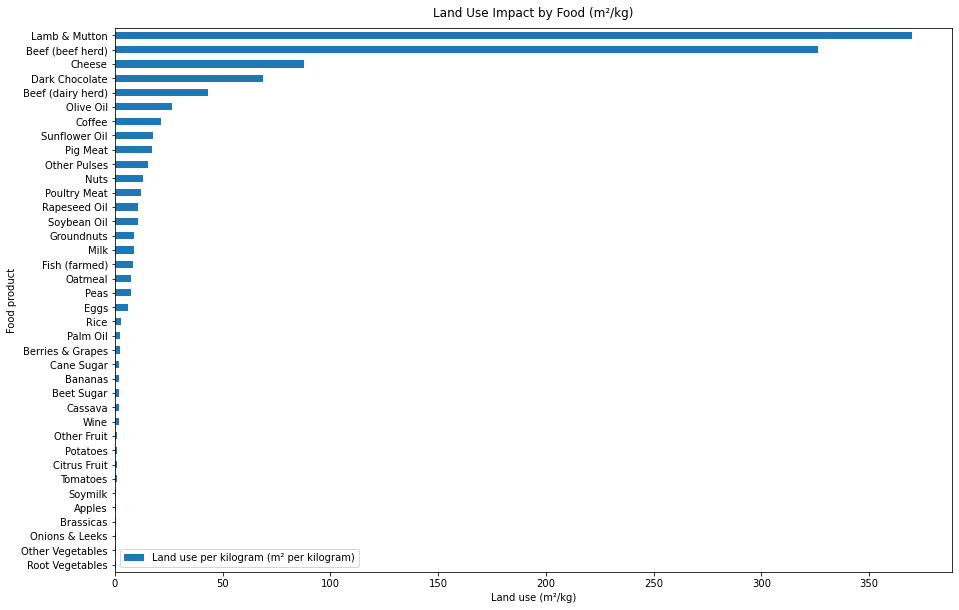

In [130]:
#create chart for land use analysis
fig, ax = plt.subplots(figsize=(15, 10))

df_lu.plot(x='Food product', y='Land use per kilogram (m² per kilogram)', kind = 'barh', ax=ax)
plt.xlabel('Land use (m²/kg)')
plt.title('Land Use Impact by Food (m²/kg)', y=1.01)

plt.show()

The Land Use bar chart shows that 4 out of the top 5 foods in amount of land used are animal-based. This was expected since leading contributor to deforestation is livestock, so it makes sense that Lamb and Beef are at the top of the list.

### Analyze Eutrophying emissions impact of different foods

In [131]:
#create dataframe for land use
df_ee = df.sort_values(by='Eutrophying emissions per kilogram (gPO₄eq per kilogram)', ascending=True)
df_ee = df_ee.dropna(subset=['Eutrophying emissions per kilogram (gPO₄eq per kilogram)'])
df_ee.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
6,Cassava,0.6,0.0,0.2,0.0,0.1,0.0,0.0,0.9,0.708419,...,NaN,0.0,1.355236,14.666667,1.858316,1.81,20.111111,0.0,NaN,NaN
13,Soymilk,0.2,0.0,0.1,0.2,0.1,0.1,0.3,1.0,NaN,...,NaN,27.8,NaN,NaN,NaN,0.66,NaN,955.6,NaN,NaN
27,Apples,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,3.020833,...,6003.333333,180.1,0.895833,14.333333,1.312500,0.63,21.000000,12948.6,431620.00000,26976.250000
22,Root Vegetables,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,4.351351,...,284.000000,28.4,1.162162,4.300000,0.891892,0.33,3.300000,929.2,9292.00000,2511.351351
25,Citrus Fruit,-0.1,0.0,0.3,0.0,0.1,0.0,0.0,0.3,7.000000,...,1378.333333,82.7,1.218750,6.500000,2.687500,0.86,14.333333,4662.7,77711.66667,14570.937500


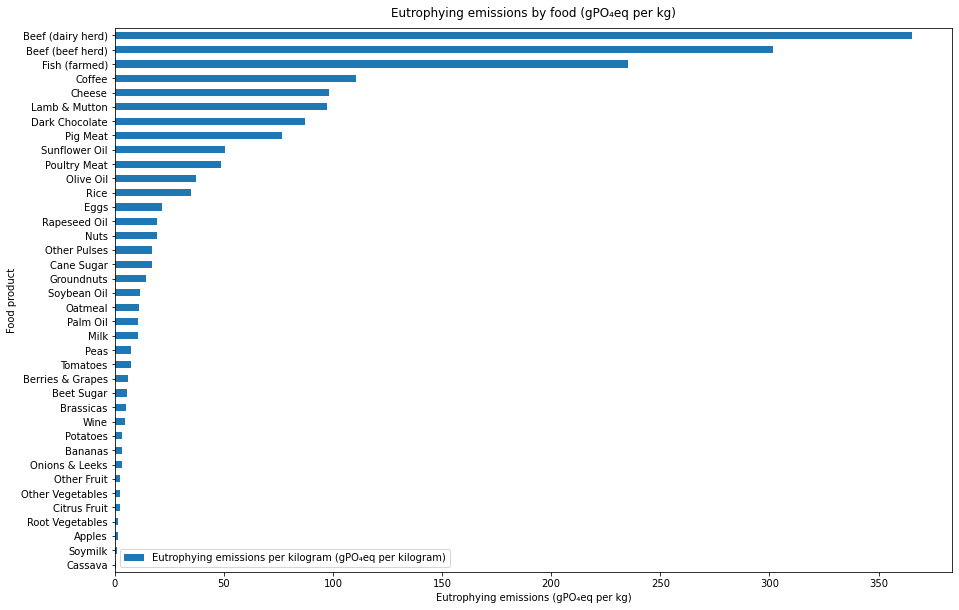

In [132]:
#create chart for land use analysis
fig, ax = plt.subplots(figsize=(15, 10))

df_ee.plot(x='Food product', y='Eutrophying emissions per kilogram (gPO₄eq per kilogram)', kind = 'barh', ax=ax)
plt.xlabel('Eutrophying emissions (gPO₄eq per kg)')
plt.title('Eutrophying emissions by food (gPO₄eq per kg)', y=1.01)

plt.show()

We can see both Beef(diary herd) and Beef(beef herd) at the top of this list. And 7 out of the top 10 are animal-based food products.

### Use k-Means clustering to analyze the different foods 

I am interested to see if we can cluster the foods in the dataset into different groups based on their overall environmental impact. I will use a k-Means clustering model to create the clusters. 

In [21]:
df.shape

(43, 23)

In [22]:
df.columns

Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per 100g protein 

I will use Total emissions, Land use per kilogram, and Scarcity-weighted water use per kg, and Eutrophying emissions per kilogram as the features for the k-means clustering model. I believe these features will capture the overall environmental impact.

In [23]:
#set features to be used in the k-means clustering model
features = ['Total_emissions',
       'Land use per kilogram (m² per kilogram)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
        'Eutrophying emissions per kilogram (gPO₄eq per kilogram)']

In [24]:
#create subset of the df with Food product as the index
df = df.set_index('Food product')
select_df = df[features]
select_df

,Total_emissions,Land use per kilogram (m² per kilogram),Scarcity-weighted water use per kilogram (liters per kilogram),Eutrophying emissions per kilogram (gPO₄eq per kilogram)
Food product,,,,
Wheat & Rye (Bread),1.4,NaN,NaN,NaN
Maize (Meal),1.1,NaN,NaN,NaN
Barley (Beer),1.1,NaN,NaN,NaN
Oatmeal,1.6,7.60,18786.2,11.23
Rice,4.0,2.80,49576.3,35.07
Potatoes,0.3,0.88,2754.2,3.48
Cassava,0.9,1.81,0.0,0.69
Cane Sugar,2.6,2.04,16438.6,16.92
Beet Sugar,1.4,1.83,9493.3,5.41


Seems like there are some rows with null values, so I will removed them from the dataset

In [25]:
#checking number of rows prior to removing null values
select_df.shape

(43, 4)

In [26]:
#removing null values and checking number of rows after they are removed
select_df = select_df.dropna()
select_df.shape

(38, 4)

In [27]:
#verifying indexes
select_df.index

Index(['Oatmeal', 'Rice', 'Potatoes', 'Cassava', 'Cane Sugar', 'Beet Sugar',
       'Other Pulses', 'Peas', 'Nuts', 'Groundnuts', 'Soymilk', 'Soybean Oil',
       'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil', 'Tomatoes',
       'Onions & Leeks', 'Root Vegetables', 'Brassicas', 'Other Vegetables',
       'Citrus Fruit', 'Bananas', 'Apples', 'Berries & Grapes', 'Wine',
       'Other Fruit', 'Coffee', 'Dark Chocolate', 'Beef (beef herd)',
       'Beef (dairy herd)', 'Lamb & Mutton', 'Pig Meat', 'Poultry Meat',
       'Milk', 'Cheese', 'Eggs', 'Fish (farmed)'],
      dtype='object', name='Food product')

In [28]:
#checking number of foods in the index
len(select_df.index)

38

Looks like we dropped 5 rows due to having null values

Next I will scale the features using StandardScaler in order to compare the different values in the different columns.

In [29]:
X = StandardScaler().fit_transform(select_df)
X

array([[-4.28653359e-01, -2.79720530e-01, -3.17455501e-01,
        -4.27248574e-01],
       [-2.08534067e-01, -3.41695659e-01,  2.31018830e-01,
        -1.35491997e-01],
       [-5.47884643e-01, -3.66485710e-01, -6.03038870e-01,
        -5.22093938e-01],
       [-4.92854820e-01, -3.54478029e-01, -6.52100354e-01,
        -5.56238269e-01],
       [-3.36936987e-01, -3.51508387e-01, -3.59274084e-01,
        -3.57613720e-01],
       [-4.46996634e-01, -3.54219799e-01, -4.82993032e-01,
        -4.98474383e-01],
       [-4.28653359e-01, -1.76815993e-01, -2.51702923e-01,
        -3.55655622e-01],
       [-5.02026457e-01, -2.81528138e-01, -1.54249736e-01,
        -4.72651968e-01],
       [-5.57056280e-01, -2.10514970e-01,  3.44300341e+00,
        -3.30322731e-01],
       [-3.55280262e-01, -2.60224187e-01,  4.48726271e-01,
        -3.91635670e-01],
       [-4.83683182e-01, -3.69326237e-01, -6.35077932e-01,
        -5.51710168e-01],
       [-2.51013228e-02, -2.42018993e-01, -3.86891877e-01,
      

In order to see the number of k clusters to use in the model, I will create an elbow plot of the WSSE.

C:\Users\sjue\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WSSE')

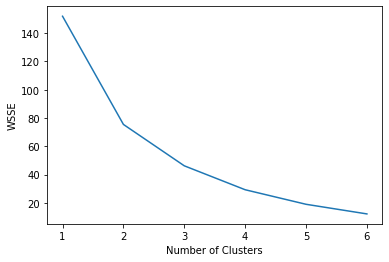

In [30]:
#create elbow plot of WSSE to select value for k
numClusters = [1,2,3,4,5,6]
WSSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(X)
    WSSE.append(k_means.inertia_)

plt.plot(numClusters, WSSE)
plt.xlabel('Number of Clusters')
plt.ylabel('WSSE')

Based on the elbow plot above, I will use k=3 for the number of clusters in the model.

In [31]:
#using k-means clustering model
kmeans = KMeans(n_clusters=3)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(n_clusters=3)


In [32]:
#getting cluster centroids
centers = model.cluster_centers_
centers

array([[-0.2721623 , -0.27869972, -0.3702049 , -0.24543613],
       [ 3.28127388,  4.11547813,  0.92132916,  1.87400591],
       [ 0.53666146,  0.17185866,  2.50097464,  1.02648609]])

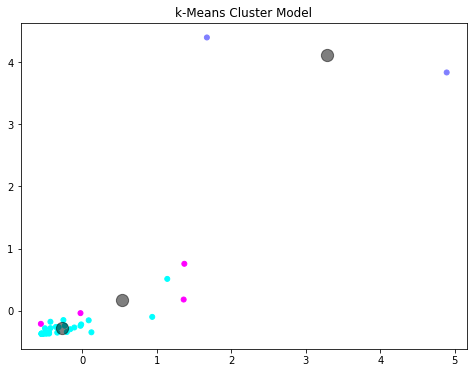

In [138]:
#plotting k-means clustering model
y_kmeans = kmeans.predict(X)

plt.figure(figsize=(8,6))

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=25, cmap='cool')

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.5)
plt.title('k-Means Cluster Model')

plt.show()

In [34]:
len(y_kmeans)

38

In [35]:
#adding cluster resuls to dataframe
select_df['cluster'] = pd.Series(y_kmeans, index=select_df.index)

<ipython-input-35-2a2c7f089d53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_df['cluster'] = pd.Series(y_kmeans, index=select_df.index)


In [36]:
#sorting df to group similar clusters together
select_df = select_df.sort_values(by='cluster')
select_df

,Total_emissions,Land use per kilogram (m² per kilogram),Scarcity-weighted water use per kilogram (liters per kilogram),Eutrophying emissions per kilogram (gPO₄eq per kilogram),cluster
Food product,,,,,
Oatmeal,1.6,7.60,18786.2,11.23,0
Milk,2.8,8.95,19786.3,10.65,0
Poultry Meat,6.1,12.22,14177.9,48.70,0
Pig Meat,7.2,17.36,66867.4,76.38,0
Dark Chocolate,18.7,68.96,2879.2,87.08,0
Coffee,16.5,21.62,337.0,110.52,0
Other Fruit,0.7,0.89,9533.1,2.43,0
Wine,1.4,1.78,1149.3,4.57,0
Berries & Grapes,1.1,2.41,21162.1,6.12,0


In [143]:
select_df.loc[select_df['cluster'] != 0]

,Total_emissions,Land use per kilogram (m² per kilogram),Scarcity-weighted water use per kilogram (liters per kilogram),Eutrophying emissions per kilogram (gPO₄eq per kilogram),cluster
Food product,,,,,
Beef (beef herd),59.6,326.21,34732.5,301.41,1
Lamb & Mutton,24.5,369.81,141925.0,97.13,1
Beef (dairy herd),21.1,43.24,119805.2,365.29,2
Cheese,21.2,87.79,180850.6,98.37,2
Nuts,0.2,12.96,229889.8,19.15,2
Olive Oil,6.0,26.31,177480.2,37.26,2


In [144]:
select_df.loc[select_df['cluster'] == 0]

,Total_emissions,Land use per kilogram (m² per kilogram),Scarcity-weighted water use per kilogram (liters per kilogram),Eutrophying emissions per kilogram (gPO₄eq per kilogram),cluster
Food product,,,,,
Oatmeal,1.6,7.60,18786.2,11.23,0
Milk,2.8,8.95,19786.3,10.65,0
Poultry Meat,6.1,12.22,14177.9,48.70,0
Pig Meat,7.2,17.36,66867.4,76.38,0
Dark Chocolate,18.7,68.96,2879.2,87.08,0
Coffee,16.5,21.62,337.0,110.52,0
Other Fruit,0.7,0.89,9533.1,2.43,0
Wine,1.4,1.78,1149.3,4.57,0
Berries & Grapes,1.1,2.41,21162.1,6.12,0


In [37]:
select_df.describe()

,Total_emissions,Land use per kilogram (m² per kilogram),Scarcity-weighted water use per kilogram (liters per kilogram),Eutrophying emissions per kilogram (gPO₄eq per kilogram),cluster
count,38.000000,38.000000,38.000000,38.000000,38.000000
mean,6.273684,29.264474,36607.428947,46.141316,0.263158
std,11.049537,78.490074,56891.283046,82.808808,0.644486
min,0.200000,0.330000,0.000000,0.690000,0.000000
25%,0.800000,1.112500,3325.075000,3.752500,0.000000
50%,2.000000,6.865000,14533.050000,11.460000,0.000000
75%,6.000000,14.917500,35960.175000,45.840000,0.000000
max,59.600000,369.810000,229889.800000,365.290000,2.000000


Cluster 1 has the highest environmental impact. This cluster contains Lamb & mutton and Beef(beef herd). We can see that Lamb and Mutton has the max value for Land use per kg and Beef(beef herd) has the max value for Total GHG emissions. Additionally, the other feature values for these foods are also well above their respective means. 

Cluster 2 has medium environmental impact. This cluster contains Beef(dairy herd), Cheese, Nuts, and Olive oil. We can see that Beef(dairy herd) has the max value for Eutrophying emissions per kg and has other feature values well above their respective means. All the feature values for Cheese exceed their respective means. Nuts has the max value and Olive oil has the 3rd highest value for Scarcity-weighted water use per kg. Upon further research, it appears that the majority of the nuts and olives grown in the US are grown in California which has been suffering from severe drought conditions. So this would explain their high scarcity-weighted water use.

Cluster 0 has the lowest environmental impact among the dataset as can be seen by the lower feature values.

Cluster 1 and cluster 2 are primarily animal-based food products while cluster 0 primarily contains plant-based foods.

We can clearly see that animal-based foods have a much higher environmental impact than plant-based foods. Reducing or eliminating animal-based foods, specifically Beef and Lamb, would significantly help create a more sustainable environment by decreasing GHG emissions, land use, scarcity-weighted water use, and eutrophying emissions.